In [2]:
import csv
import pandas as pd

dates = []
services = []
with open ('operating_budget.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        dates.append(row[0])
        services.append(row[2])

In [10]:
import pandas as pd 
df_operation_budget = pd.read_csv('operating_budget.csv') 

In [14]:
# To see the basic layout of the variable
df_operation_budget.head()

,fiscal_year,service,department,program,expense_category,fund,fund_type,expense_type,description,recommended_amount,approved_amount
0,2013,"Arts, Culture & Recreation",2008 Parks Levy,2008 Parks Levy Fund BCL-1,2008 Parks Levy Fund Program,General Fund,Tax-Supported Fund,Operating Expense,2008 Parks Levy Fund Program,0,NaN
1,2011,"Arts, Culture & Recreation",2008 Parks Levy,Support to Multi-Purpose Trails,Support to Multi-Purpose Trails,General Fund,Tax-Supported Fund,Operating Expense,Support to Multi-Purpose Trails,0,0.0
2,2010,"Arts, Culture & Recreation",2008 Parks Levy,Support to Multi-Purpose Trails,Support to Multi-Purpose Trails,General Fund,Tax-Supported Fund,Operating Expense,Support to Multi-Purpose Trails,0,3500000.0
3,2015,"Arts, Culture & Recreation",2012 Library Levy,Library Levy Operating Transfer,Library Levy Operating Transfer,General Fund,Tax-Supported Fund,Operating Expense,Library Levy Operating Transfer,0,13139976.0
4,2014,"Arts, Culture & Recreation",2012 Library Levy,Library Levy Operating Transfer,Library Levy Operating Transfer,General Fund,Tax-Supported Fund,Operating Expense,Library Levy Operating Transfer,0,12421257.0


In [17]:
# To do a chisquare test
from scipy.stats import chisquare
distribution=schoolPub['approved_amount'].value_counts()
chisquare(distribution)

Power_divergenceResult(statistic=154726.20044493873, pvalue=0.0)

In [18]:
import numpy as np
symbolsForNA=['†']
df_operation_budget.replace(symbolsForNA,np.nan,inplace=True)

In [19]:
# To know the frequency of 'expense_type'
df_operation_budget['expense_type'].value_counts()

Operating Expense    4535
Name: expense_type, dtype: int64

In [48]:
df_operation_budget['service'].value_counts()

Administration                  1503
Utilities & Transportation       726
Arts, Culture & Recreation       500
Public Safety                    465
Health & Human Services          334
Neighborhoods & Development      297
Funds, Subfunds & Other          271
Utilities & Transportation        86
Public Safety                     58
Funds, Subfunds and Other         55
Neighborhoods & Development       54
Arts, Culture & Recreation        47
Education & Human Services        41
Seattle Public Library            14
Pike Street Markey Levy           13
Name: service, dtype: int64

In [50]:
df_operation_budget['service'].dtypes

dtype('O')

In [ ]:
from pandas.api.types import CategoricalDtype
df_operation_budget['service']=df_operation_budget['service'].astype(CategoricalDtype(ordered=True))

In [ ]:
df_operation_budget['service'].cat.categories

In [42]:
import numpy as np
relFrequencies=df_operation_budget['approved_amount'].value_counts(sort=False,normalize=True) 
cumulativeTable=np.cumsum(relFrequencies)
pos =0
for percent in cumulativeTable:
    if percent < 0.5: 
        pos +=1 
    else:
        break
cumulativeTable.index[pos]

18732271.0

In [28]:
df_operation_budget.describe()

,fiscal_year,recommended_amount,approved_amount
count,4535.000000,4535.0,4.495000e+03
mean,2013.896141,0.0,9.759568e+06
std,2.535939,0.0,2.767249e+07
min,2010.000000,0.0,-3.127986e+07
25%,2012.000000,0.0,4.520000e+05
50%,2014.000000,0.0,1.990672e+06
75%,2016.000000,0.0,7.439770e+06
max,2018.000000,0.0,4.053470e+08


In [58]:
# To know the Standard Deviation of approved_amount
df_operation_budget['approved_amount'].std()

27672488.564149734

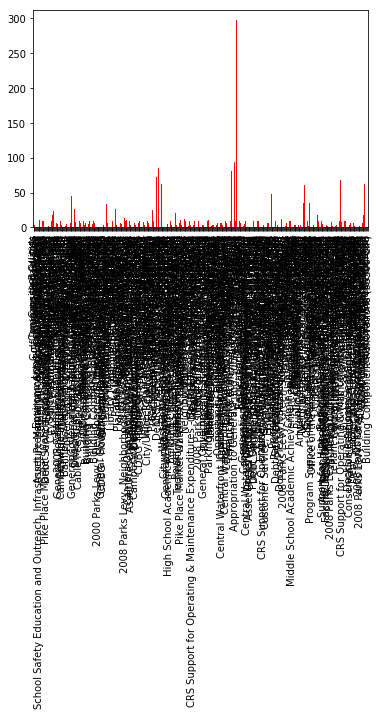

In [65]:
%matplotlib inline  

df_operation_budget['program'].value_counts(sort=False).plot.bar(color='r')
